### About the Dataset

The dataset used in this project was obtained from the Environmental Protection Agency (EPA) and contains hourly measurements for air pollutant gases NO2, PM2.5 and PM10 for the period January 2019 to October 2020. The monitoring stations that collected the data are located in St. John's Road in Dublin City Centre.

The air quality monitoring stations at St John's Road were selected, as they provided NO2, PM2.5 and PM10 data emissions over a continuous 22 month period. This data was not available for other monitoring stations across the country. Its location is opposite Heuston Station in Dublin City Centre, and as a monitoring location, it is highly affected by traffic emissions.

The overall aim of this assignment is to determine if there was an effect on pollutant levels during the covid-19 restrictions compared to the same period in 2019. January to June 2020 pollutant levels will be compared to the same period in 2019. 

### Objectives

The goals of this assessment are as follows:

- Preprocess the dataset so as to create a clean dataset for analysis
- Look at descriptive statistics for the dataset
- Visualise the dataset
- Create a dashboard in Tableau - link below

https://dub01.online.tableau.com/t/airpollutantsjohnsroaddublin/views/StJohnsRoadPollutantLevels/Dashboard1?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link

### Import Python Libraries

Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib and Seaborn..

- NumPy - an array processing package.
- Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
- Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
- Seaborn library - a plotting and styling library.

In [39]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for converting date/time
from datetime import date, timedelta, datetime, time

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Data Preprocessing

### Load the Dataset

The dataset was obtained from the Environmental Protection Agency (EPA). It is a csv file and contains 4 columns and 16081 rows. The csv file is imported into Python using Pandas.

In [40]:
# read in St Johns Road Hourly Data csv file using pandas
df = pd.read_csv("St Johns Road 2019 2020.csv", parse_dates=['DateTime'], encoding= 'unicode_escape')

# display the first 5 rows of the dataframe
df.head()

,DateTime,PM10 (µg/m³),PM2 5 (µg/m³),NO2 (µg/m³)
0,2019-01-01 00:00:00,14.2,8.8,22.92
1,2019-01-01 01:00:00,14.1,8.4,21.97
2,2019-01-01 02:00:00,12.3,7.4,25.40
3,2019-01-01 03:00:00,12.0,7.1,27.12
4,2019-01-01 04:00:00,12.5,7.0,17.76


In [41]:
# check the datatypes
df.dtypes

DateTime         datetime64[ns]
PM10 (µg/m³)            float64
PM2 5 (µg/m³)           float64
NO2 (µg/m³)             float64
dtype: object

The types of data are datetime64 and float64. The datatypes do not need to be changed as they are correct. 

The three variables, PM10, PM2.5 and NO2 are all measured in µg/m³ and are type float64. The DateTime variable is of type datetime64 as required.

In [42]:
# print column names
df.columns

Index(['DateTime', 'PM10 (µg/m³)', 'PM2 5 (µg/m³)', 'NO2 (µg/m³)'], dtype='object')

In [43]:
# check how many samples the dataset contains
df.shape

(16081, 4)

In [44]:
# check how many entries, columns and datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16081 entries, 0 to 16080
Data columns (total 4 columns):
DateTime         16081 non-null datetime64[ns]
PM10 (µg/m³)     15894 non-null float64
PM2 5 (µg/m³)    15894 non-null float64
NO2 (µg/m³)      15926 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 502.7 KB


In [45]:
# check for any missing values in the dataset - a clean dataset is required for analysis
df.isnull().sum()

DateTime           0
PM10 (µg/m³)     187
PM2 5 (µg/m³)    187
NO2 (µg/m³)      155
dtype: int64

There are a number of missing values in the dataset - all rows containing missing values will be dropped from the dataset.

In [46]:
# drop all rows with NaN values
df.dropna(axis=0,inplace=True)

In [47]:
# check to see if NaN values have been removed
df.isnull().sum()

DateTime         0
PM10 (µg/m³)     0
PM2 5 (µg/m³)    0
NO2 (µg/m³)      0
dtype: int64

All missing values have been dropped from the dataset.

In [48]:
# change index of the dataframe to DateTime
df = df.set_index('DateTime')

# display first 3 rows of the dataframe
df.head(3)

,PM10 (µg/m³),PM2 5 (µg/m³),NO2 (µg/m³)
DateTime,,,
2019-01-01 00:00:00,14.2,8.8,22.92
2019-01-01 01:00:00,14.1,8.4,21.97
2019-01-01 02:00:00,12.3,7.4,25.40


In [49]:
# check the index column of the dataframe is now DateTime
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15821 entries, 2019-01-01 00:00:00 to 2020-01-11 00:00:00
Data columns (total 3 columns):
PM10 (µg/m³)     15821 non-null float64
PM2 5 (µg/m³)    15821 non-null float64
NO2 (µg/m³)      15821 non-null float64
dtypes: float64(3)
memory usage: 494.4 KB


In [50]:
# check the index of the dataframe
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-01-11 00:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=15821, freq=None)

In [51]:
# Add year, month, and weekday name columns to the dataframe
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

# Display the first 5 rows of the dataframe
df.head()

,PM10 (µg/m³),PM2 5 (µg/m³),NO2 (µg/m³),Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday
2019-01-01 02:00:00,12.3,7.4,25.40,2019,1,Tuesday
2019-01-01 03:00:00,12.0,7.1,27.12,2019,1,Tuesday
2019-01-01 04:00:00,12.5,7.0,17.76,2019,1,Tuesday


In [52]:
# select a specific date using the loc command
df.loc['2019-01-04']

,PM10 (µg/m³),PM2 5 (µg/m³),NO2 (µg/m³),Year,Month,Weekday Name
DateTime,,,,,,
2019-01-04 00:00:00,18.7,11.9,57.11,2019,1,Friday
2019-01-04 01:00:00,13.9,8.4,46.03,2019,1,Friday
2019-01-04 02:00:00,14.7,8.0,45.46,2019,1,Friday
2019-01-04 03:00:00,14.9,8.0,44.12,2019,1,Friday
2019-01-04 04:00:00,15.4,8.6,56.92,2019,1,Friday
2019-01-04 05:00:00,14.7,8.3,48.13,2019,1,Friday
2019-01-04 06:00:00,16.4,8.9,53.29,2019,1,Friday
2019-01-04 07:00:00,17.8,10.1,59.97,2019,1,Friday
2019-01-04 08:00:00,26.8,12.7,66.47,2019,1,Friday


In [53]:
# display first 5 rows of the dataset
df.head()

,PM10 (µg/m³),PM2 5 (µg/m³),NO2 (µg/m³),Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday
2019-01-01 02:00:00,12.3,7.4,25.40,2019,1,Tuesday
2019-01-01 03:00:00,12.0,7.1,27.12,2019,1,Tuesday
2019-01-01 04:00:00,12.5,7.0,17.76,2019,1,Tuesday


In [54]:
# rename the column names
df.rename(columns = {'PM10 (µg/m³)':'PM10', 'PM2 5 (µg/m³)':'PM2 5', 'NO2 (µg/m³)':'NO2'}, inplace = True)

# check the column names have changed
df.head(3)

,PM10,PM2 5,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday
2019-01-01 02:00:00,12.3,7.4,25.40,2019,1,Tuesday


In [55]:
# rename the column name PM2.5 as not recognised when creating plots
df.rename(columns = {'PM2.5':'PM2 5'}, inplace = True)

# check the column name has changed
df.head(2)

,PM10,PM2 5,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday


In [60]:
# rename the column name PM2 5 as not recognised when creating plots
df.rename(columns = {'PM2 5':'PM25'}, inplace = True)

# check the column name has changed
df.head(2)

,PM10,PM25,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday


## Descriptive Statistics

Now that the dataset has been loaded into a Panda's dataframe and the data has been preprocessed, the dataset needs to be further analysed to learn more about what it contains.

The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range (median), 50% quartile range and 75% quartile range are calculated for all variables.

### NO2

EU legislation inline with the World Health Organisation (WHO) guidelines, recommend limits of NO2 do not exceed 40 μg/m3 in any given hour.

In [61]:
# calculate descriptive statistics on the hourly time series data
df.describe()

,PM10,PM25,NO2,Year,Month
count,15821.000000,15821.000000,15821.000000,15821.000000,15821.000000
mean,13.422439,7.765325,37.327663,2019.459958,6.259592
std,10.110271,7.717629,22.534322,0.498410,3.336509
min,0.700000,0.300000,0.380000,2019.000000,1.000000
25%,7.200000,3.600000,19.670000,2019.000000,3.000000
50%,10.900000,5.600000,33.430000,2019.000000,6.000000
75%,16.300000,8.800000,50.620000,2020.000000,9.000000
max,110.200000,87.900000,151.460000,2020.000000,12.000000


The descriptive statistics reveal that there are 15,821 samples for each variable in the hourly time series dataframe.

EU legislation for NO2 limit values align with the World Health Organisation (WHO) guidelines, with 1 hour and 1 year limit values of 200 μg/m3 and 40 μg/m3 respectively. It can be seen from the table above that the hourly NO2 limit has not been exceeded between January 2019 and October 2020.

### PM10

World Health Organisation (WHO) guidelines provide for a daily average limit for PM10 of 50 µg/m3. The dataset is resampled to a daily frequency to determine whether this limit was exceeded. 

In [62]:
# create a variable called dataColumns
dataColumns = ['PM10', 'PM25', 'NO2']

# resample to daily frequency, aggregating with mean
dfDaily = df[dataColumns].resample('D').mean()

# display first 5 rows
dfDaily.head()

,PM10,PM25,NO2
DateTime,,,
2019-01-01,16.091667,10.837500,50.209167
2019-01-02,14.504167,9.195833,69.357500
2019-01-03,21.158333,12.108333,63.213750
2019-01-04,21.141667,12.658333,60.149167
2019-01-05,9.283333,4.220833,48.554583


In [63]:
# calculate descriptive statistics on the daily time series data
dfDaily.describe()

,PM10,PM25,NO2
count,667.000000,667.000000,667.000000
mean,13.444705,7.775407,37.410800
std,7.945401,6.221240,16.044192
min,2.537500,1.637500,5.920000
25%,8.554167,4.327083,25.686250
50%,11.129167,5.866667,35.152083
75%,15.683333,8.850000,47.596042
max,69.725000,57.950000,94.396667


The descriptive statistics reveal that by resampling the hourly dataset to a daily average the number of samples have been reduced to 667 for each variable.

World Health Organisation (WHO) guidelines for PM10 is that levels should not exceed an average daily mean of 50 µg/m3. It can be seen from the table above that this value has been exceeded.

### PM2.5

World Health Organisation (WHO) guidelines provide for a yearly average limit for PM2.5 of 20 µg/m3. The dataset is resampled to a yearly averaged frequency to determine whether this limit was exceeded.

In [64]:
# create a variable called dataColumns1
dataColumns1 = ['PM10', 'PM25', 'NO2']

# resample to yearly frequency, aggregating with mean
dfYearly = df[dataColumns1].resample('Y').mean()

# display first 4 rows
dfYearly.head(2)

,PM10,PM25,NO2
DateTime,,,
2019-12-31,13.802996,8.469944,43.953375
2020-12-31,12.975622,6.938024,29.548347


In [65]:
# calculate descriptive statistics on the yearly time series data
dfYearly.describe()

,PM10,PM25,NO2
count,2.000000,2.000000,2.000000
mean,13.389309,7.703984,36.750861
std,0.585042,1.083231,10.185893
min,12.975622,6.938024,29.548347
25%,13.182465,7.321004,33.149604
50%,13.389309,7.703984,36.750861
75%,13.596153,8.086964,40.352118
max,13.802996,8.469944,43.953375


The descriptive statistics reveal that by resampling the hourly dataset to a yearly mean the number of samples has been reduced to 2 for each variable.

The World Health Organisation (WHO) guidelines for PM25 is that levels should not exceed an annual mean of 20 µg/m3. It can be seen from the above resampling dataframe that this limit has not been exceeded.

## Data Visualisation

In this section the following plots will be created:
 
 - Line plots for PM10, PM2.5 and NO2 from January 2019 to October 2020 for hourly time series data
 - Line plots for PM10, PM2.5 and NO2 from January 2019 to October 2020 for daily averaged time series data
 - Daily line plots for the variable NO2 selecting a working day during lockdown and the same working day from 2019

In [66]:
# experimenting with how data can accessed using the loc command
df.loc['2019-01']

,PM10,PM25,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2019-01-01 00:00:00,14.2,8.8,22.92,2019,1,Tuesday
2019-01-01 01:00:00,14.1,8.4,21.97,2019,1,Tuesday
2019-01-01 02:00:00,12.3,7.4,25.40,2019,1,Tuesday
2019-01-01 03:00:00,12.0,7.1,27.12,2019,1,Tuesday
2019-01-01 04:00:00,12.5,7.0,17.76,2019,1,Tuesday
...,...,...,...,...,...,...
2019-01-12 19:00:00,26.3,23.2,85.95,2019,1,Saturday
2019-01-12 20:00:00,19.7,17.0,83.47,2019,1,Saturday
2019-01-12 21:00:00,21.0,18.8,71.82,2019,1,Saturday


### Line plots for PM10, PM2.5 and NO2 from January 2019 to October 2020

First line plots are created on the hourly time series data for pollutants PM10, PM2.5 and NO2. There are 15,821 samples so these plots may not show any meaningful information.

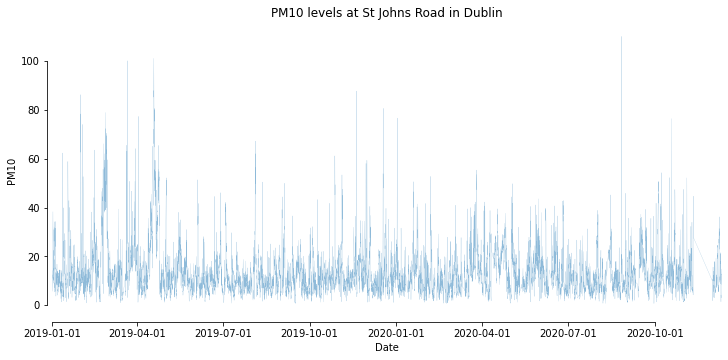

In [67]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot PM10 levels from January 2019 to October 2020
df.PM10.plot(lw=0.2, alpha=0.5)

# add title and axis labels to plot
ax.set(title='PM10 levels at St Johns Road in Dublin', xlabel='Date', ylabel='PM10')
sns.despine(offset=5, trim=True)       

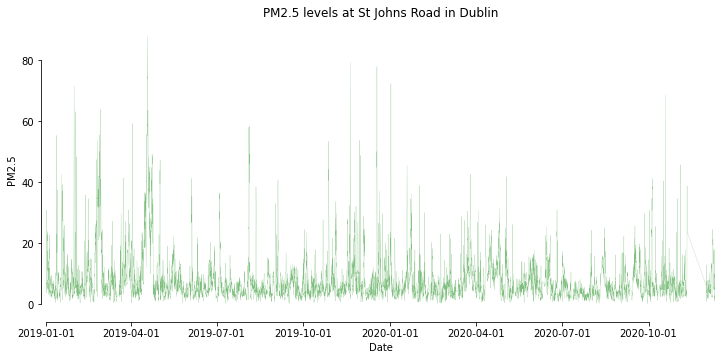

In [70]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot PM2.5 levels from January 2019 to October 2020
df.PM25.plot(lw=0.2, alpha=0.5, color='Green')

# add title and axis labels to plot
ax.set(title='PM2.5 levels at St Johns Road in Dublin', xlabel='Date', ylabel='PM2.5')
sns.despine(offset=5, trim=True)   

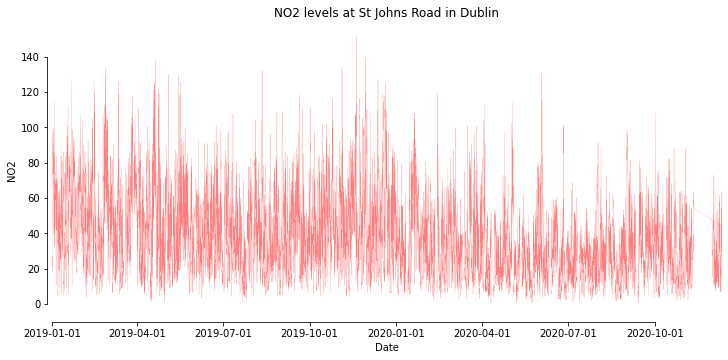

In [69]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels from January 2019 to October 2020
df.NO2.plot(lw=0.2, alpha=0.5, color='red')

# add title and axis labels to plot
ax.set(title='NO2 levels at St Johns Road in Dublin', xlabel='Date', ylabel='NO2')
sns.despine(offset=5, trim=True)  

These line plots are not very intuitive as there are too many data points. The maximum and minimum values for the variables PM10, PM2.5 and NO2 can be seen but apart from that very little information is provided from these visualisations. 

### Resample Data to a Daily Mean Time Series

As the hourly dataset has a lot of values one solution is to resample the data from an hourly time series to a daily mean time series. This will reduce the number of data points considerably from 15,821 to 667.

In [71]:
# create a variable called dataColumns
dataColumns = ['PM10', 'PM25', 'NO2', 'Year', 'Month']

# resample to daily frequency, aggregating with mean
dfDaily = df[dataColumns].resample('D').mean()

# display first 4 rows
dfDaily.head(4)

,PM10,PM25,NO2,Year,Month
DateTime,,,,,
2019-01-01,16.091667,10.837500,50.209167,2019.0,1.0
2019-01-02,14.504167,9.195833,69.357500,2019.0,1.0
2019-01-03,21.158333,12.108333,63.213750,2019.0,1.0
2019-01-04,21.141667,12.658333,60.149167,2019.0,1.0


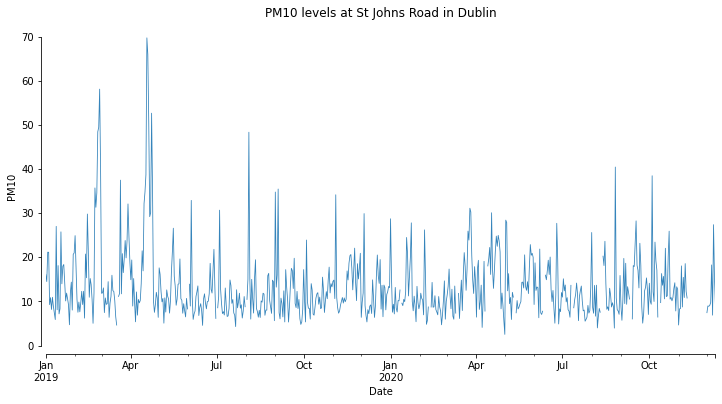

In [72]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels from January 2019 to October 2020
dfDaily.PM10.plot(lw=0.8, alpha=0.9)

# add title and axis labels to plot
ax.set(title='PM10 levels at St Johns Road in Dublin', xlabel='Date', ylabel='PM10')
sns.despine(offset=5, trim=True) 

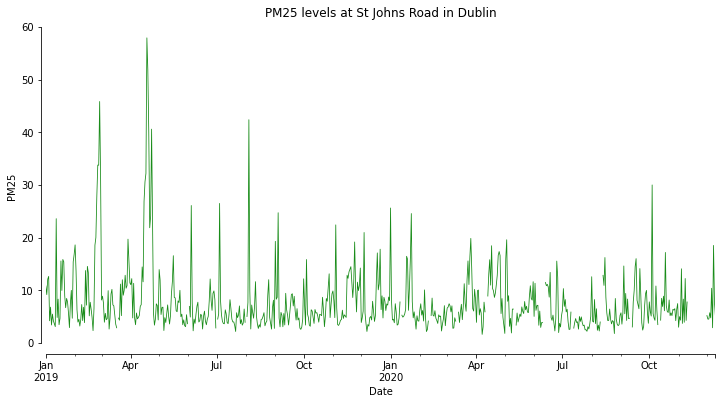

In [73]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels from January 2019 to October 2020
dfDaily.PM25.plot(lw=0.8, alpha=0.9, color='Green')

# add title and axis labels to plot
ax.set(title='PM25 levels at St Johns Road in Dublin', xlabel='Date', ylabel='PM25')
sns.despine(offset=5, trim=True)

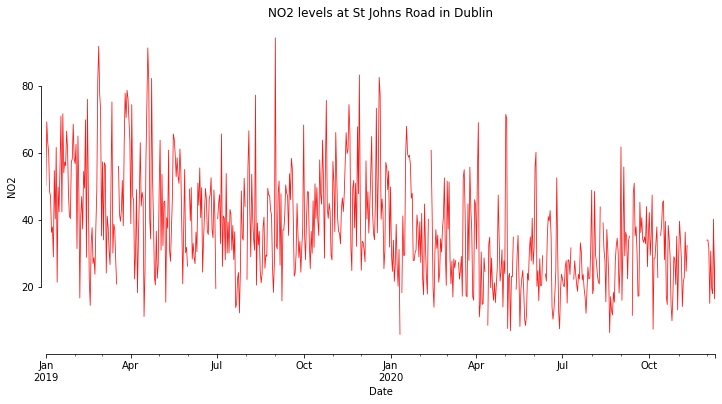

In [74]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels from January 2019 to October 2020
dfDaily.NO2.plot(lw=0.8, alpha=0.9, color='red')

# add title and axis labels to plot
ax.set(title='NO2 levels at St Johns Road in Dublin', xlabel='Date', ylabel='NO2')
sns.despine(offset=5, trim=True) 

The resampled plots are clearer due to the reduced number of data points. It can be seen that PM10, PM25 and NO2 levels are lower between January to June 2020 in comparison to the same period in 2019. 

PM10 and PM25 pollutants are primarily causing by burning coal, peat and wood. Levels did not decrease significantly for the period. This could be due to the fact that more people were working from home and lighting fires more frequently.

The NO2 pollutant gas is primarily caused by diesel fuelled road traffic. The lockdown in Ireland commenced on the 12th March 2020 until 29th June 2020. The line graph shows NO2 levels reduced in this period in comparison to 2019. This was mainly due to the fact that there was less traffic on the roads due to the lockdown restrictions. Businesses and schools were closed and people were advised to work from home. 

The NO2 levels continue to be lower from June to October 2020 in comparison to the same period in 2019.

### Daily line plots for NO2

A line plot for the pollutant gas NO2 for 30th April 2020, a day in full lockdown, will be compared to the same day in 2019 to determine if there is a significant difference in the pollutant levels. PM10 and PM25 will not be analysed this way as there was not a significant difference in 2019 and 2020 levels as shown in plots previously.

In [75]:
# display values for working day Thursday 30th April 2020 to check that have 24 values
df.loc['2020-04-30']

,PM10,PM25,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2020-04-30 00:00:00,8.5,4.1,12.80,2020,4,Thursday
2020-04-30 01:00:00,11.7,4.7,6.30,2020,4,Thursday
2020-04-30 02:00:00,9.7,3.9,31.52,2020,4,Thursday
2020-04-30 03:00:00,5.1,2.6,44.69,2020,4,Thursday
2020-04-30 04:00:00,6.3,3.2,35.72,2020,4,Thursday
2020-04-30 05:00:00,6.7,3.4,31.52,2020,4,Thursday
2020-04-30 06:00:00,5.3,3.7,30.18,2020,4,Thursday
2020-04-30 07:00:00,3.7,2.3,30.18,2020,4,Thursday
2020-04-30 08:00:00,3.3,2.1,40.30,2020,4,Thursday


In [76]:
# display values for working day Tuesday 30th April 2019 to check that have 24 values
df.loc['2019-04-30']

,PM10,PM25,NO2,Year,Month,Weekday Name
DateTime,,,,,,
2019-04-30 00:00:00,2.3,1.6,8.60,2019,4,Tuesday
2019-04-30 01:00:00,1.9,1.5,5.80,2019,4,Tuesday
2019-04-30 02:00:00,2.9,2.2,1.34,2019,4,Tuesday
2019-04-30 03:00:00,3.3,2.2,2.70,2019,4,Tuesday
2019-04-30 04:00:00,1.4,1.0,4.70,2019,4,Tuesday
2019-04-30 05:00:00,1.2,0.9,5.20,2019,4,Tuesday
2019-04-30 06:00:00,2.1,1.6,7.26,2019,4,Tuesday
2019-04-30 07:00:00,3.9,3.1,15.66,2019,4,Tuesday
2019-04-30 08:00:00,7.4,4.3,30.37,2019,4,Tuesday


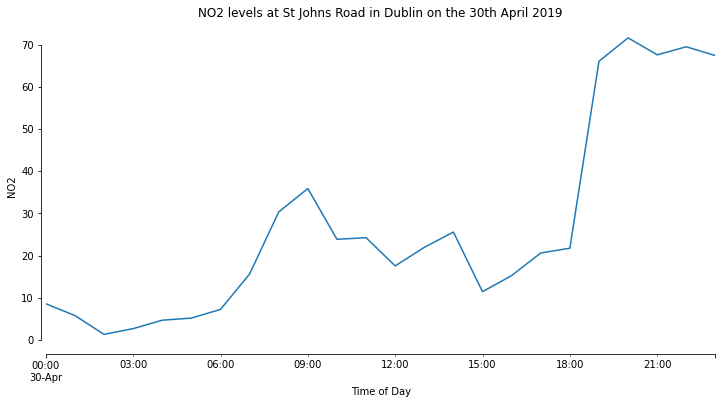

In [80]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels for Thursday 30th April 2019
ax = df.loc['2019-04-30', 'NO2'].plot()

# add title and axis labels to plot
ax.set(title='NO2 levels at St Johns Road in Dublin on the 30th April 2019', xlabel='Time of Day', ylabel='NO2')
sns.despine(offset=5, trim=True)

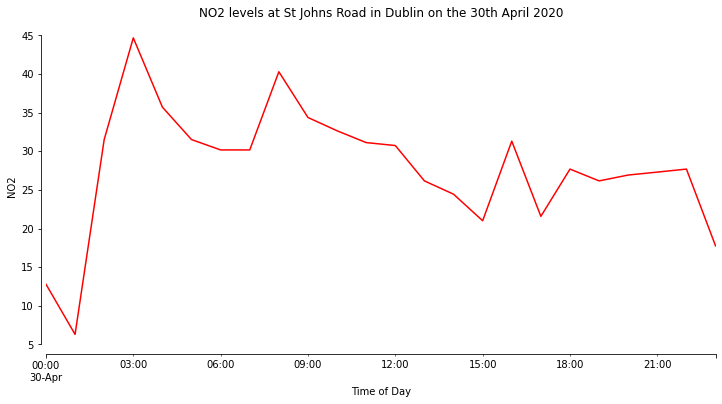

In [79]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(12,6))

# plot NO2 levels for Thursday 30th April 2020
ax = df.loc['2020-04-30', 'NO2'].plot(color='red')

# add title and axis labels to plot
ax.set(title='NO2 levels at St Johns Road in Dublin on the 30th April 2020', xlabel='Time of Day', ylabel='NO2')
sns.despine(offset=5, trim=True)

It can be seen from the plots above that NO2 levels on a typical working day in April 2019 were a lot higher than in April 2020. There are peaks in the 2019 plot in the morning and the evening signifying increased traffic levels during rush hours. These peaks, although present on the same day in 2020, were not as prominent and pollutant levels were lower in value. The peaks that are still visible in 2020 during the morning and evening are probably due to deliveries and public transport.

NO2 levels were above 70µg/m3 in 2019 in the evening rush hour at around 8pm whereas NO2 levels for the same day and time in 2020 were just above 25µg/m3.

## Conclusion

In conclusion it can clearly be seen that the Covid-19 pandemic has had an impact on air quality at St Johns Road in Dublin City Centre in Ireland. 

The Particulate Matter (PM) monitoring station provided hourly measurements for PM10 and PM2.5. After conducting an analysis on the data it can be concluded that the levels of PM10 and PM2.5 decreased slightly in 2020 during the Covid-19 restrictions compared to the same period in 2019. 

PM10 and PM2.5 pollutants primarily come from burning wood, peat and coal and levels are significantly affected by the weather. A further analysis of the levels is required to determine whether there was a bigger decrease in levels than can be seen from just analysing the monitoring station data. The low decrease in PM levels could also be due to the fact that more people were working from home and lighting fires.

The road surface monitoring station provided hourly measurements for Nitrogen Dioxide (NO2). After conducting an analysis on the data it can be concluded that the level of NO2 decreased significantly during the Covid-19 restrictions compared to the same period in 2019. 

The road surface monitoring station measures NO2 pollutant levels which primarily come from diesel fuelled vehicles. During restrictions there were fewer vehicles on the road hence the substantial decrease in levels. Peaks were still seen during the morning and evening rush hour periods in the lockdown but levels were not as high in comparison to 2019. These peaks in 2020 were more so due to public transport still running and Heavy Goods Vehicles delivering to the City Centre.

## The End